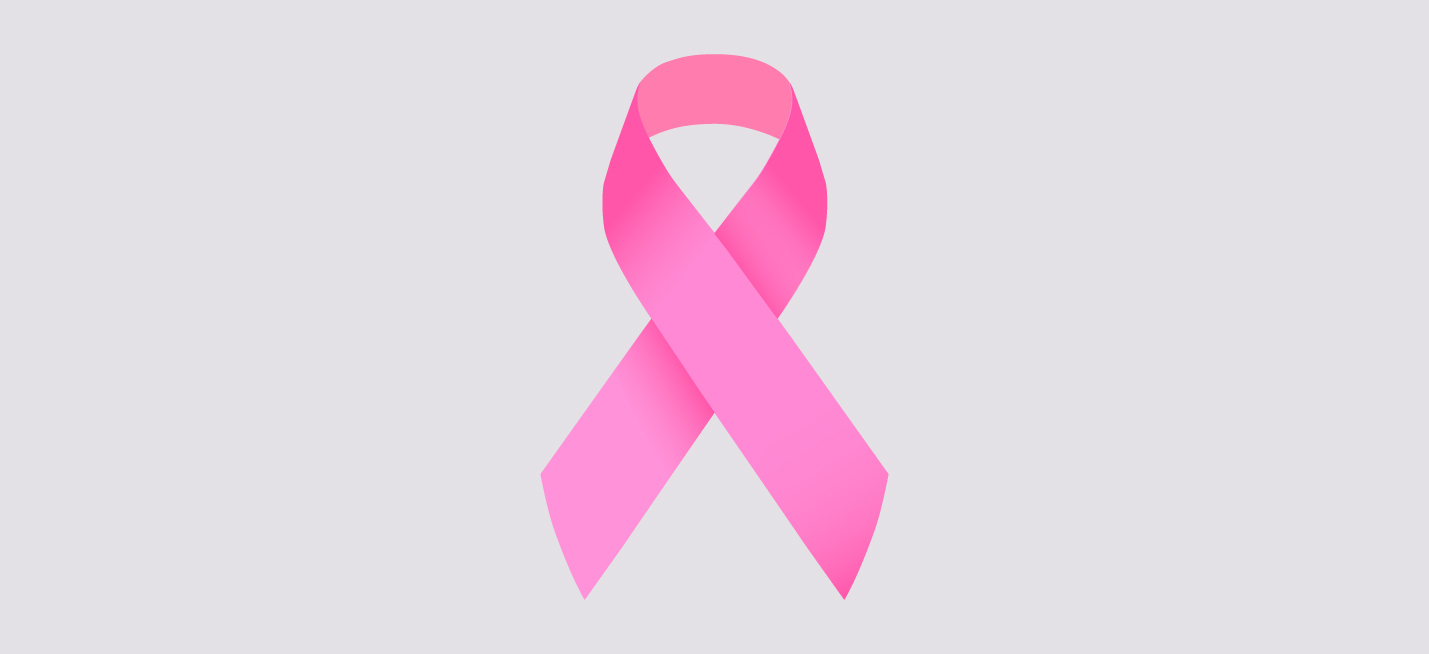


# Predicting over Malignant and Benign Breast Cancer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Cleaning data

Dropping non neccesary data and transforming target column into numeric binary classification.

In [2]:
data.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
data["diagnosis"] = [1 if row == 'M' else 0 for row in data['diagnosis']]
y = data["diagnosis"].values
data.drop('diagnosis',axis=1, inplace=True)

# Checking some metrics

In [3]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Displaying heatmap

Observing correlation between features.

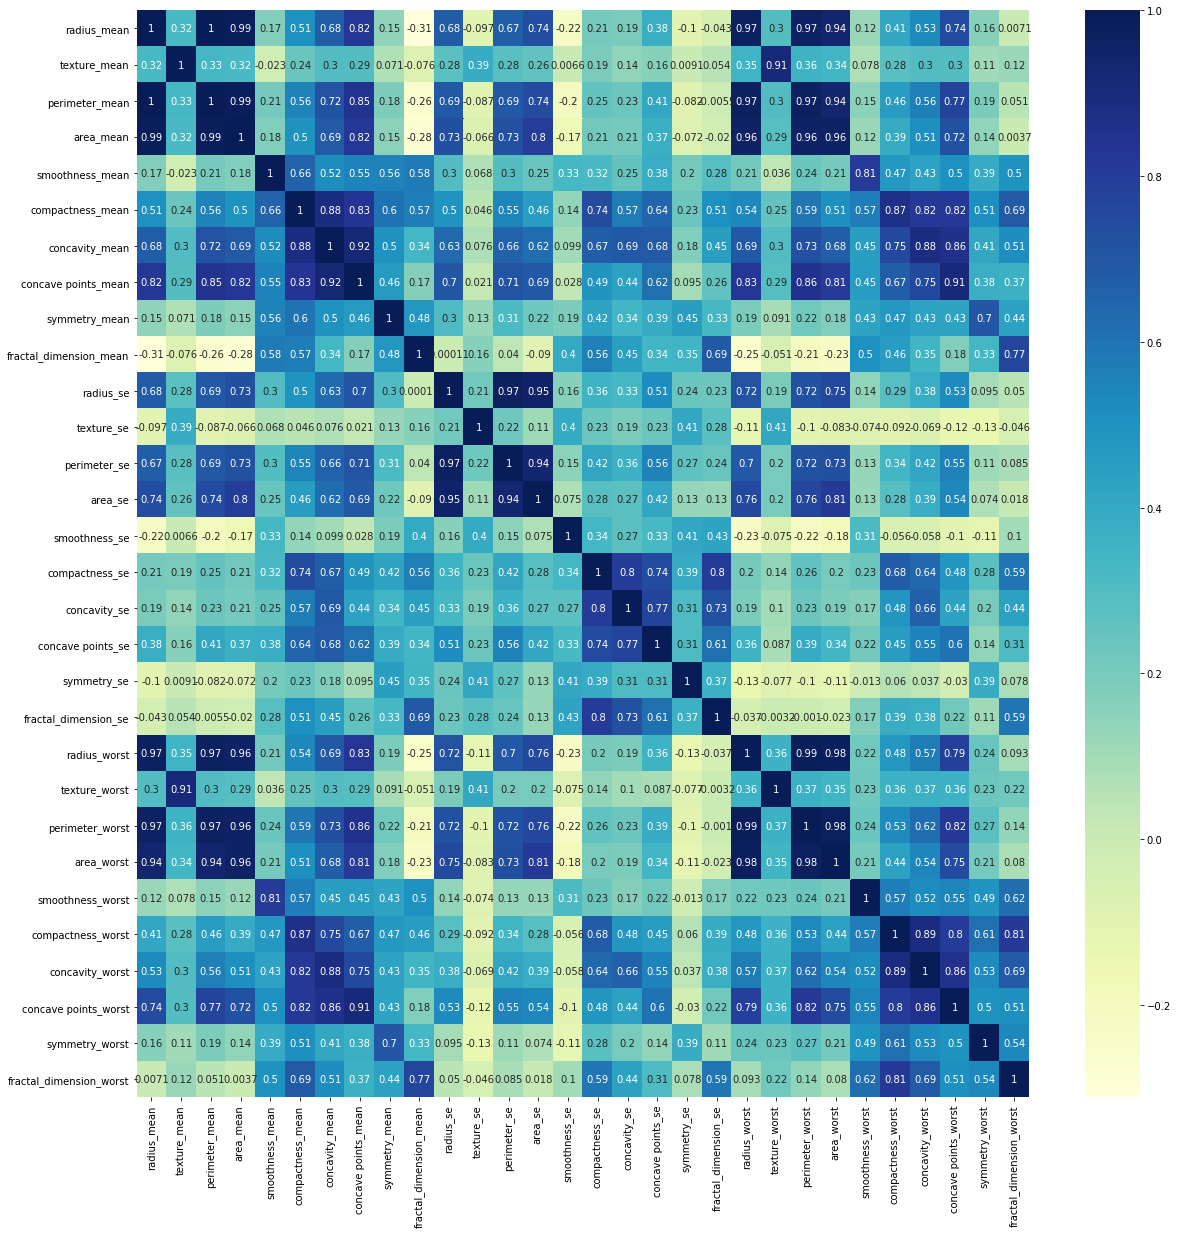

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# Normalizing data

Organize the data into logical groups, in such a way that each group describes a small part of the whole. Minimize the amount of duplicate data stored in a database.

In [5]:
norm_data = (data - np.min(data)) / (np.max(data) - np.min(data)).values

In [6]:
norm_data.shape

(569, 30)

# Splitting data

Using scikit-learn function train_test_split to prepare data for training and future predictions.

Train = 80%

Test = 20%

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_data, y, test_size=0.20, random_state=4)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (455, 30)
x test:  (114, 30)
y train:  (455,)
y test:  (114,)


# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).



In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', max_iter=25)
lr.fit(X_train, y_train)
print(lr.classes_)
print('Coefficient of the features in the decision function: ', lr.coef_)

[0 1]
Coefficient of the features in the decision function:  [[ 1.84976098  1.68737151  1.81763838  1.55086009  0.50953388  0.39036432
   1.42013489  1.93715355  0.46909194 -0.87901032  1.27056115  0.01482908
   0.99684723  0.81973442 -0.07124207 -0.55111312 -0.15980273  0.28437866
  -0.36095593 -0.64500498  2.34822483  2.20231871  2.14610408  1.67773558
   1.25728186  0.75687814  1.43712682  2.49490271  1.17525275  0.32127747]]


In [9]:
predictions = lr.predict(X_test)

# Finding Best Score

Importing accuracy_score and roc_auc_score functions from scikit-learn library.

The model has an accuracy of 96.5% on accuracy_score function and 97.5% on roc_auc_score function.

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score
accuracy_score = accuracy_score(predictions, y_test)
auc = roc_auc_score(y_test, predictions)

print('accuracy_score: {}  %'.format(accuracy_score*100))
print('auc: {}  %'.format(auc*100))

accuracy_score: 96.49122807017544  %
auc: 97.5  %


# Plotting Confusion Matrix

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

1 = Malignant Cancer,   0 = Benign Cancer

True Positive: total number of predictions match the actual number of Malignant Breast Cancer.

True Negative: 95% of predictions match the actual number of Benign Breast Cancer.

False Positive: 5% of predictions don't match the actual number of Benign Breast Cancer.

False Negative: No bad predictions on Malignant Breast Cancer.

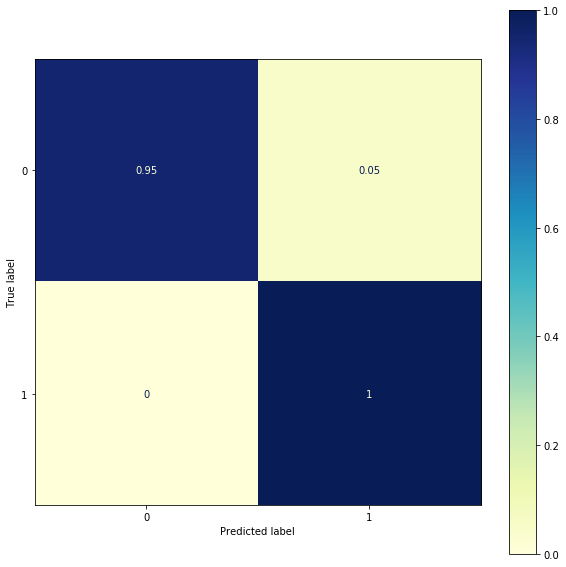

In [11]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(lr, X_test,y_test, display_labels=lr.classes_, cmap="YlGnBu", normalize='true', ax=ax)